In [5]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="BTC_XRP"
start=string2ts("2017-07-01 00:00:00")
end=string2ts("2017-09-30 23:59:59")
period=3600*2

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)
per = 0.92
cum_return1 = marketReturn(df["close"])
#cum_return1 = marketReturn(df_train)
#cum_return2 = marketReturn(df_test) 

marketReturn = cum_return1[-1]*100 

from strategy2 import EMAvsSMA,pricevsEMA, pricevsSMA
from profit import profit,profit2

#EMA_5vsSMA_13
w = EMAvsSMA(df['close'])
relativeReturn,v = profit(w)

#Precio vs SMA_20
w3 = pricevsSMA(df['close'])
relativeReturn3,v3 = profit(w3)

#Precio vs EMA_5
# 23.6
w2 = pricevsEMA(df['close'])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start = ml_init_time(end,start,per)
# cargando y preparando datos
df2 = prepareData(pair=pair, start=start, end=end, period=period)
w4, t = run_strategy("ml_logreg",df2,pair,True,per)
relativeReturn4,v4 = profit(w4)

print 'Retorno del mercacdo: %s'%(marketReturn)
print 'Retorno de EMA vs SMA: %s'%(relativeReturn*100)
print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de Precio vs EMA5: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)


per: 0.92, 1-Per: 0.08, Pocentaje Test-Train 12

Nuevo tiempo inicial 2014-06-23 00:00:12

Retorno del mercacdo: -53.3010785203
Retorno de EMA vs SMA: -17.5069023004
Retorno de Precio vs SMA20: -6.1744328737
Retorno de Precio vs EMA5: -30.8827557101
Retorno de ml_logreg: 0.132304468795


1099 1099 1104 1104


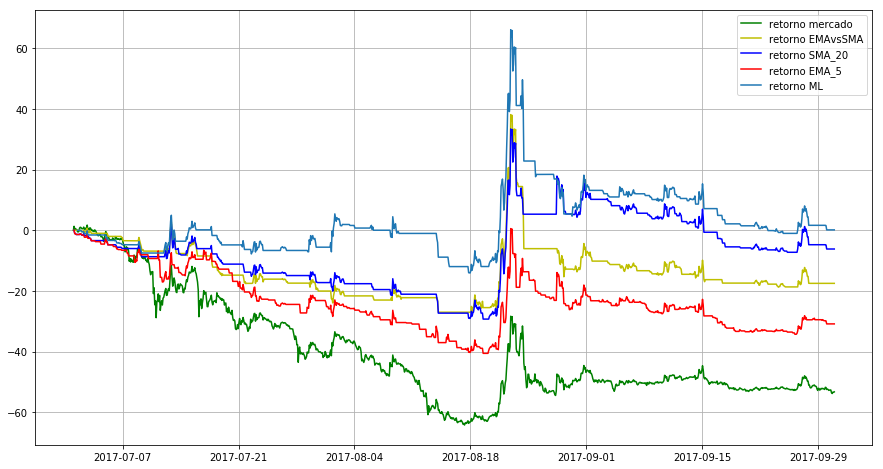

In [6]:
plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
plt.plot(df.index[:],v*100,'y',label='retorno EMAvsSMA')
plt.plot(df.index[:],v3*100,'b',label='retorno SMA_20')
plt.plot(df.index[:],v2*100,'r',label='retorno EMA_5')
plt.plot(df2.index[int(len(df2)*per):],v4*100,label='retorno ML')

plt.legend(loc='best')
plt.grid()

print len(df2.index[int(len(df2)*per):]), len(v4), len(v2), len(df.index)